In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [25]:
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [27]:
#Cek Duplikat
duplicate_rows = df[df.duplicated()]
print(f"Total Duplicate Rows: {df.duplicated().sum()}")
print(duplicate_rows)

Total Duplicate Rows: 0
Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 37 columns]


In [33]:
#Encode Kolom Target
label_encoder = LabelEncoder()
df_e = df.copy()
df_e['Target'] = label_encoder.fit_transform(df_e['Target'])
df_e.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [36]:
#Scaling kolom kecuali kolom Target

num_cols = df_e.select_dtypes(include=['float64', 'int64']).columns.drop(['Target'], errors='ignore')

scaler = StandardScaler()

df_scaled = df_e.copy()

df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print(df_scaled.head())

   Marital status  Application mode  Application order    Course  \
0       -0.294829         -0.095470           2.490896 -4.209520   
1       -0.294829         -0.209869          -0.554068  0.192580   
2       -0.294829         -1.010660           2.490896  0.103404   
3       -0.294829         -0.095470           0.207173  0.444115   
4        1.356212          1.162916          -0.554068 -0.408389   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.350082                -0.35023   
1                      0.350082                -0.35023   
2                      0.350082                -0.35023   
3                      0.350082                -0.35023   
4                     -2.856470                -0.35023   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841    -0.126298               -0.036018   
1                        2.076819    -0.126298               -1.189759   
2             

# EDA

In [38]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


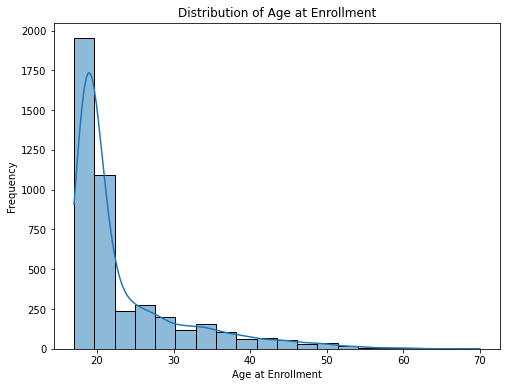

In [56]:
# Distribution of the 'Age at enrollment' variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Age at enrollment'], bins=20, kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

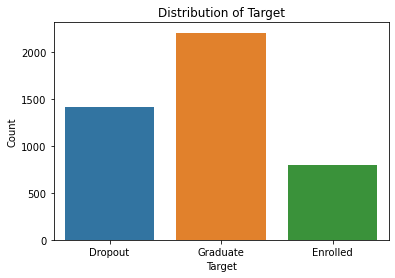

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

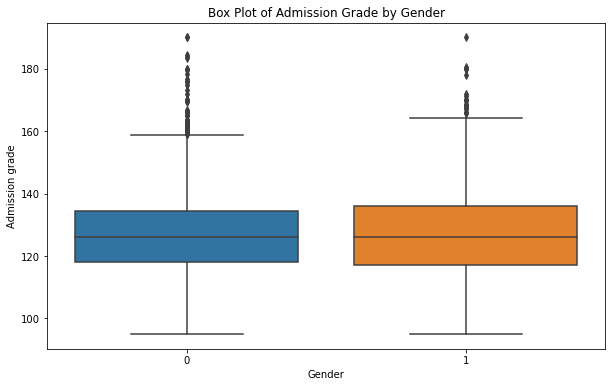

In [42]:
# Box plot of 'Admission grade' by 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Admission grade', data=df)
plt.title('Box Plot of Admission Grade by Gender')
plt.show()

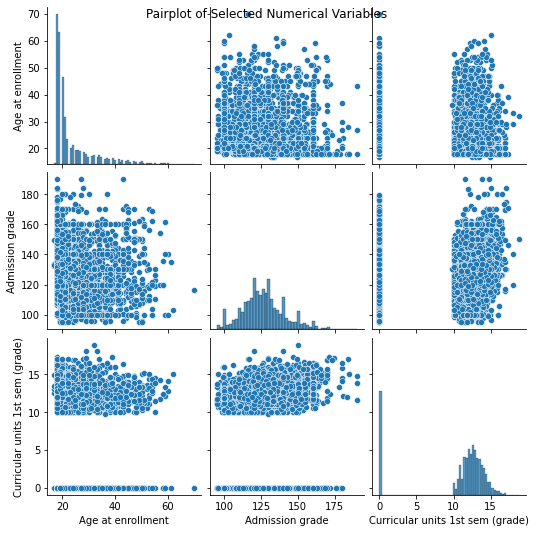

In [59]:
# Pairplot for selected numerical variables
numerical_cols_df = ['Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)']
sns.pairplot(df[numerical_cols_df])
plt.suptitle('Pairplot of Selected Numerical Variables')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


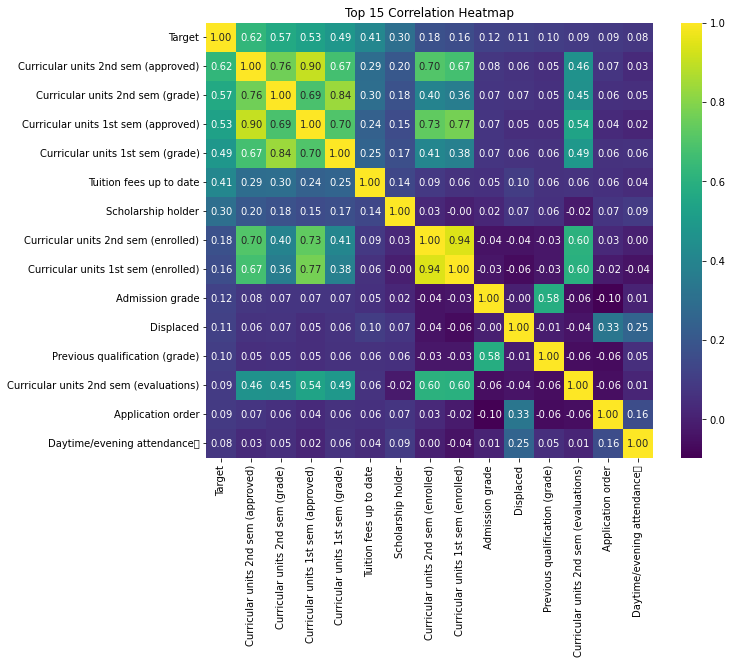

In [55]:
# Correlation matrix
top_corr_columns =  df_scaled.corr().nlargest(15, 'Target')['Target'].index
top_corr_matrix = df_scaled[top_corr_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Top 15 Correlation Heatmap')
plt.show()

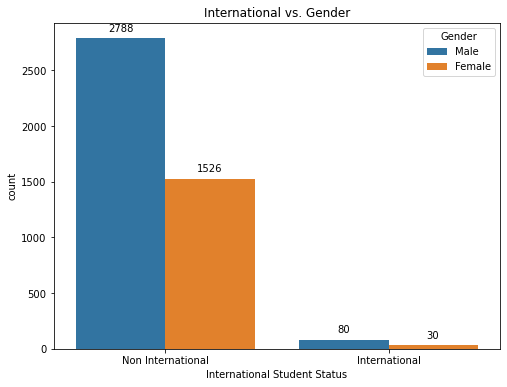

In [63]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='International', hue='Gender', data=df)
plt.title('International vs. Gender')
plt.xlabel('International Student Status')
plt.xticks(ticks=[0, 1], labels=['Non International', 'International'])
plt.legend(title='Gender', labels=['Male', 'Female'])

# Add labels for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Clustering

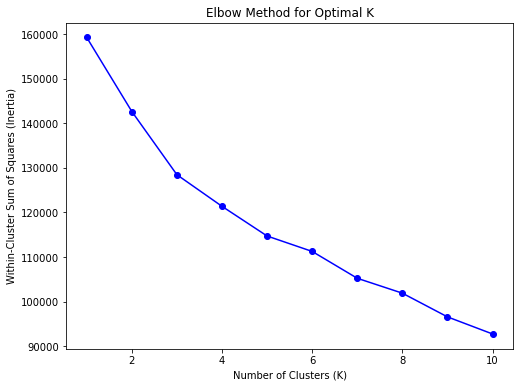

Best cluster is : 3


In [85]:
#K-Means Clustering

# Drop non-numeric columns and 'Target' column for clustering
cluster_data = df_scaled.select_dtypes(include=['float64', 'int64']).drop(columns=['Target'], errors='ignore')

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Initialize a list to store the inertia values for different numbers of clusters
inertia_values = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()
findknee = KneeLocator(range(1, 11),
                       inertia_values,
                       curve="convex",
                       direction="decreasing")
print('Best cluster is :', findknee.elbow)

In [104]:
best_kmeans = KMeans(n_clusters=findknee.elbow, n_init=10, random_state=42)  
best_kmeans.fit(cluster_data)
df['Kmeans Cluster'] = best_kmeans.labels_

In [105]:
aggregation_dict = {
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Kmeans Cluster').agg(aggregation_dict)
cluster_summary

,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Kmeans Cluster,,,,,,,,,,,,,
0,1.147059,16.315646,4.092177,126.843451,1,0,22.058520,5.239539,12.720325,5.086113,12.499877,0.066534,Graduate
1,1.260355,23.061538,4.795266,126.749231,1,0,26.157396,0.342012,1.862443,0.081657,0.567140,-0.255763,Dropout
2,1.302491,33.081851,9.622776,129.246975,1,0,28.729537,11.576512,12.632019,9.896797,12.649831,0.019217,Graduate


In [118]:
hier = AgglomerativeClustering(n_clusters=findknee.elbow)
y_hier = hier.fit_predict(df_scaled)
df["Hierarchical Cluster"] = y_hier

In [119]:
aggregation_dict = {
    'Marital status': 'mean',  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Hierarchical Cluster').agg(aggregation_dict)
cluster_summary

,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Hierarchical Cluster,,,,,,,,,,,,,
0,1.179931,17.080450,4.319493,126.845069,1,0,22.525952,5.051615,12.256899,4.895905,11.997655,0.067261,Graduate
1,1.295019,32.881226,8.172414,129.620690,1,0,28.804598,11.616858,12.663811,9.923372,12.688296,-0.053372,Graduate
2,1.128058,21.258993,4.516547,126.649640,1,0,24.873381,0.389928,1.816997,0.079137,0.487650,-0.303050,Dropout


# Classification

In [122]:
class_df = df_scaled.copy()

In [123]:
X = class_df.drop(['Target'], axis=1)  # Features
y = class_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [124]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

log_regress_accuracy = accuracy_score(y_test, logistic_pred)
conf_matrix = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {log_regress_accuracy:.4f}")

actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(logistic_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
comparison_df.sample(n=10)

Confusion Matrix:
[[289  34  51]
 [ 53  57  87]
 [ 15  31 489]]
Accuracy: 0.7550


,Actual,Predicted
148,Dropout,Dropout
1002,Graduate,Graduate
883,Enrolled,Graduate
206,Graduate,Graduate
584,Enrolled,Dropout
644,Dropout,Dropout
911,Graduate,Graduate
992,Graduate,Graduate
605,Dropout,Dropout
1040,Graduate,Graduate


In [127]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [128]:
actual_label = label_encoder.inverse_transform(y_test)
predicted_label = label_encoder.inverse_transform(y_pred)

compare_df = pd.DataFrame({'Actual': actual_label, 'Predicted': predicted_label})

rf_accuracy = accuracy_score(y_test, y_pred)  
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
comparison_df.sample(n=10)

Confusion Matrix:
[[290  29  55]
 [ 53  66  78]
 [ 10  27 498]]
Random Forest Accuracy: 0.7722


,Actual,Predicted
517,Dropout,Dropout
9,Graduate,Graduate
121,Dropout,Dropout
1075,Enrolled,Dropout
7,Dropout,Graduate
454,Dropout,Dropout
603,Graduate,Graduate
548,Enrolled,Graduate
304,Dropout,Dropout
471,Graduate,Graduate


In [132]:
dec_tree_model = DecisionTreeClassifier(random_state=42)
dec_tree_model.fit(X_train, y_train)
dec_tree_pred = dec_tree_model.predict(X_test)

dec_tree_accuracy = accuracy_score(y_test, dec_tree_pred)
conf_matrix = confusion_matrix(y_test, dec_tree_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {dec_tree_accuracy:.4f}")

actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(dec_tree_pred)

comparison_df = pd.DataFrame({'Actual': actual_label, 'Predicted': predicted_label})
comparison_df.sample(n=10) 

Confusion Matrix:
[[254  70  50]
 [ 60  71  66]
 [ 34  72 429]]
Accuracy: 0.6817


,Actual,Predicted
391,Dropout,Dropout
577,Enrolled,Graduate
989,Graduate,Graduate
536,Graduate,Graduate
64,Graduate,Graduate
877,Dropout,Graduate
88,Graduate,Graduate
692,Graduate,Graduate
953,Graduate,Graduate
1010,Graduate,Graduate


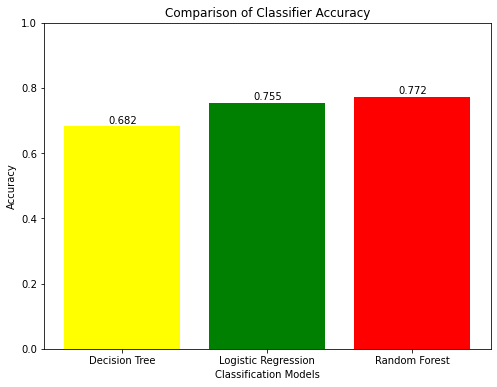

In [136]:
accuracy = [dec_tree_accuracy, log_regress_accuracy, rf_accuracy]
models = ['Decision Tree', 'Logistic Regression','Random Forest']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['yellow', 'green', 'red'])
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', color='black', fontsize=10)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracy')
plt.ylim(0, 1)
plt.show()